In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
x_data = np.linspace(0.0,10.0,1000000)

In [4]:
noise = np.random.randn(len(x_data))

In [5]:
#y = mx + b
y_true = (0.5*x_data) + 5 + noise

In [6]:
my_data = pd.concat([pd.DataFrame(x_data,columns=['x_data']),pd.DataFrame(y_true,columns=['y'])],axis=1)

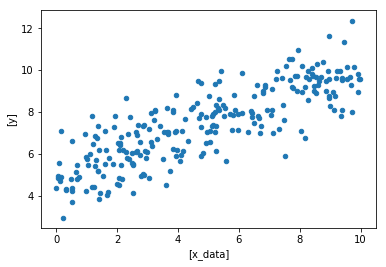

In [7]:
my_data.sample(n=250).plot(kind="scatter",x=['x_data'],y=['y'])

In [8]:
np.random.randint(10,size=20)

array([8, 0, 0, 2, 5, 7, 9, 6, 0, 0, 1, 4, 9, 6, 4, 4, 4, 8, 6, 0])

In [9]:
batches_size = 8
m = tf.Variable(0.8)
b = tf.Variable(5.0)

In [10]:
x_val = tf.placeholder(tf.float32,[batches_size])
y_val = tf.placeholder(tf.float32,[batches_size])

In [11]:
y_new = m*x_val + b

In [13]:
error = tf.reduce_sum(tf.square(y_val-y_new))
optm = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optm.minimize(error)

In [14]:
init = tf.global_variables_initializer()

In [30]:
with tf.Session() as sess:
    sess.run(init)
    batches = 10000
    for i in range(batches):
        random_int = np.random.randint(len(x_data),size=batches_size)
        fitter = {x_val:x_data[random_int],y_val:y_true[random_int]}
        sess.run(train,feed_dict=fitter)
        
    model_m , model_b = sess.run([m,b])

In [31]:
model_m

0.44802836

In [32]:
model_b

4.9790864

In [33]:
y_here = (model_m*x_data) + model_b

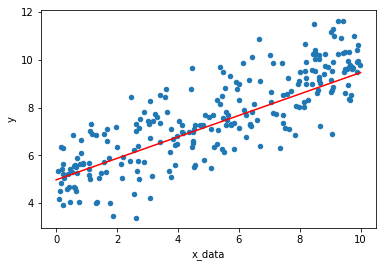

In [37]:
my_data.sample(n=250).plot(kind="scatter",x='x_data',y='y')
plt.plot(x_data,y_here,'r')

## Tensorflow Regression

In [38]:
fec_cols = [tf.feature_column.numeric_column('x',shape=(1))]

In [39]:
estimator = tf.estimator.LinearRegressor(feature_columns=fec_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpr2dag4hn', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7faaee403be0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [52]:
from sklearn.model_selection import train_test_split
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size=0.3, random_state=101)

In [53]:
input_val = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,shuffle=True,batch_size=4,num_epochs=None)

In [54]:
train_input = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,shuffle=False,batch_size=4,num_epochs=1000)

In [61]:
eval_input = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,shuffle=False,batch_size=4,num_epochs=1000)

In [62]:
estimator.train(input_val,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpr2dag4hn/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 2001 into /tmp/tmpr2dag4hn/model.ckpt.
INFO:tensorflow:loss = 9.783146, step = 2001
INFO:tensorflow:global_step/sec: 833.071
INFO:tensorflow:loss = 8.196634, step = 2101 (0.121 sec)
INFO:tensorflow:global_step/sec: 1116.23
INFO:tensorflow:loss = 18.594765, step = 2201 (0.091 sec)
INFO:tensorflow:global_step/sec: 824.589
INFO:tensorflow:loss = 9.774424, step = 2301 (0.121 sec)
INFO:tensorflow:global_step/sec: 899.411
INFO:tensorflow:loss = 21.98385, step = 2401 (0.109 sec)
INFO:tensorflow:global_step/sec: 1078.58
INFO:tensorflow:loss = 10.067284, step = 2501 (0.094 sec)
INFO:tensorflow:global_step/sec: 876.758
INFO:tensorflow:loss = 7.015828,

In [65]:
train_fun = estimator.evaluate(train_input,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-05-15-20:34:09
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpr2dag4hn/model.ckpt-3000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-05-15-20:34:10
INFO:tensorflow:Saving dict for global step 3000: average_loss = 0.98097813, global_step = 3000, loss = 7.847825


In [64]:
test_fun = estimator.evaluate(eval_input,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-05-15-20:34:03
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpr2dag4hn/model.ckpt-3000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-05-15-20:34:04
INFO:tensorflow:Saving dict for global step 3000: average_loss = 1.0089961, global_step = 3000, loss = 4.0359845


In [72]:
print(
'Train Met {}'.format(train_fun),
'\n'
'Test Met {}'.format(test_fun),
)

Train Met {'average_loss': 0.98097813, 'loss': 7.847825, 'global_step': 3000} 
Test Met {'average_loss': 1.0089961, 'loss': 4.0359845, 'global_step': 3000}


In [82]:
pred = []
preditor = tf.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,10)},shuffle=False)
for s in estimator.predict(preditor):
    pred.append(s['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpr2dag4hn/model.ckpt-3000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


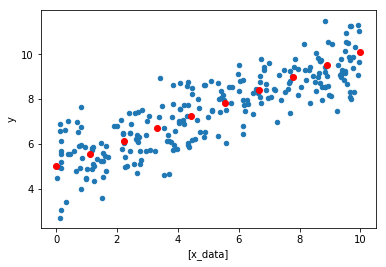

In [84]:
my_data.sample(n=250).plot(kind="scatter",x=['x_data'],y='y')
plt.plot(np.linspace(0,10,10),pred,'ro')